In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_2020 = pd.read_csv(r'/Users/laharigoshika/Downloads/2020 Cases only.csv', low_memory=False)
df_2021 = pd.read_csv(r'/Users/laharigoshika/Downloads/2021 Cases only.csv', low_memory = False)

In [3]:
df_all = df_2020.append(df_2021)

/var/folders/sm/vv0nn76n1bg57dz1nj4zfvrh0000gn/T/ipykernel_6660/52744303.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_2020.append(df_2021)


In [4]:
c_all = df_all.groupby(['EventDate']).count()

In [5]:
print(c_all.head)

<bound method NDFrame.head of            OBJECTID  County    Age  Age_group  Gender  Jurisdicti  Travel_rel  \
EventDate                                                                       
1/1/2020          0      21     21         21      21          21          21   
1/1/2021          0   13720  13719      13720   13720       13720       13720   
1/10/2020         0       2      2          2       2           2           2   
1/10/2021         0   11694  11693      11694   11694       11694       11694   
1/11/2021         0   14249  14245      14249   14249       14249       14249   
...             ...     ...    ...        ...     ...         ...         ...   
9/5/2020          0    2545   2544       2545    2545        2545        2545   
9/6/2020          0    2217   2217       2217    2217        2217        2217   
9/7/2020          0    2478   2477       2478    2478        2478        2478   
9/8/2020          0    2699   2698       2699    2699        2699        2699  

In [6]:
from datetime import datetime

In [7]:
c_all.index = pd.to_datetime(c_all.index, format="%m/%d/%Y")

In [8]:
c_sorted = c_all.sort_index(axis='index', ascending=True)

In [9]:
c_sorted.head

<bound method NDFrame.head of             OBJECTID  County   Age  Age_group  Gender  Jurisdicti  Travel_rel  \
EventDate                                                                       
2020-01-01         0      21    21         21      21          21          21   
2020-01-02         0       4     4          4       4           4           4   
2020-01-03         0       1     1          1       1           1           1   
2020-01-04         0       8     8          8       8           8           8   
2020-01-05         0       1     1          1       1           1           1   
...              ...     ...   ...        ...     ...         ...         ...   
2021-05-20         0    1936  1934       1936    1936        1936        1936   
2021-05-21         0    1831  1828       1831    1831        1831        1831   
2021-05-22         0    1286  1285       1286    1286        1286        1286   
2021-05-23         0    1026  1026       1026    1026        1026        1026  

In [10]:
df_Osceola=df_all[df_all['County']=='Osceola']
df_St_Lucie =df_all[df_all['County']=='St. Lucie']

In [11]:
df_o_count=df_Osceola.groupby(['EventDate']).count() 
df_s_count=df_St_Lucie.groupby(['EventDate']).count()

In [12]:
df_o_count.index=pd.to_datetime(df_o_count.index, format="%m/%d/%Y")
df_s_count.index=pd.to_datetime(df_s_count.index, format="%m/%d/%Y")

In [13]:
df_o_count_sorted=df_o_count.sort_index(axis='index', ascending=True)
df_s_count_sorted=df_s_count.sort_index(axis='index', ascending=True)

In [14]:
df_o_count_sorted['Date']=df_o_count_sorted.index.values
df_s_count_sorted['Date']=df_s_count_sorted.index.values

In [15]:
df_o_count_sorted['Daily Cases']=df_o_count_sorted['County']
df_o_count_sorted['Moving Averages']=df_o_count_sorted['County'].rolling(5, min_periods=0).mean()

In [16]:
df_s_count_sorted['Daily Cases']=df_s_count_sorted['County']
df_s_count_sorted['Moving Averages']=df_s_count_sorted['County'].rolling(5, min_periods=0).mean()

[]

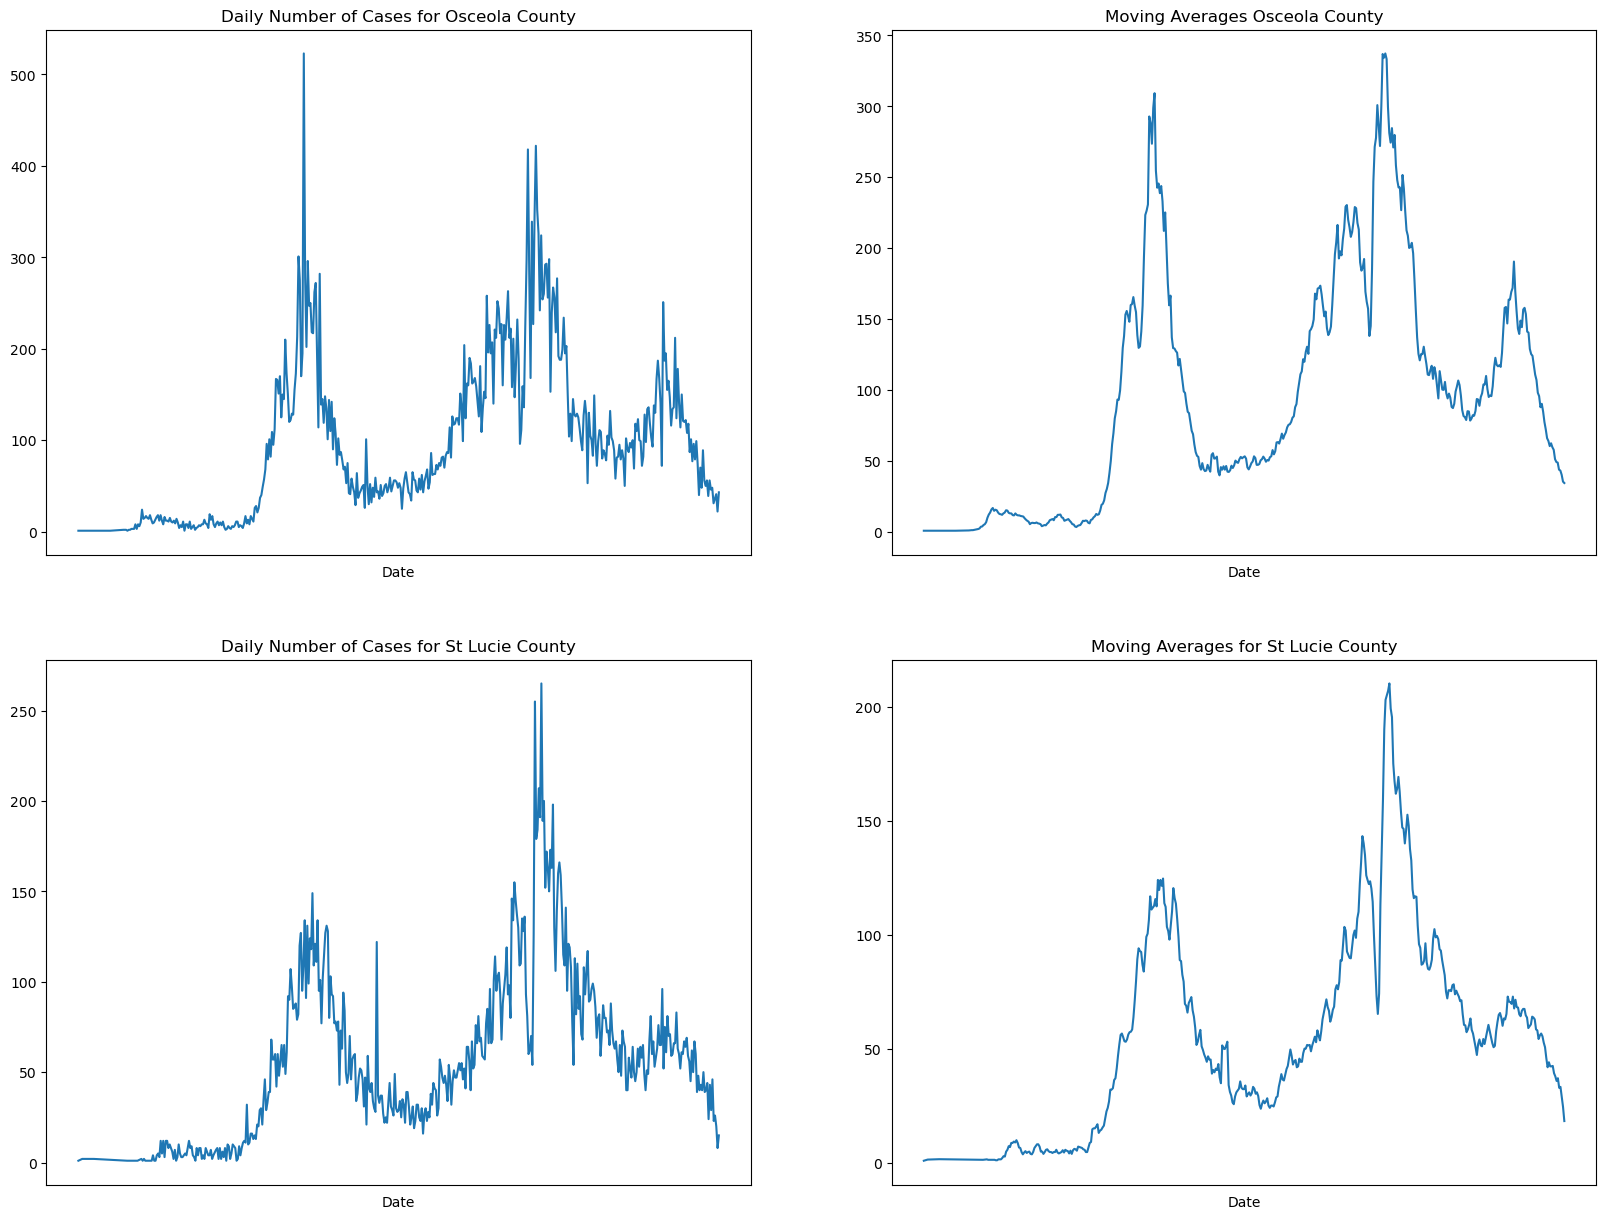

In [17]:
fig, h_axes=plt.subplots(2,2, figsize = [20, 15])

#plot of daily cases - Osceola County.
plt.sca(h_axes[0,0])
plt.plot(df_o_count_sorted['Date'], df_o_count_sorted['Daily Cases'])
h_axes[0,0].set_title('Daily Number of Cases for Osceola County')
h_axes[0,0].set_xlabel('Date')
h_axes[0,0].set_xticks([])

#plot of moving averages - Osceola County.
plt.sca(h_axes[0,1])
plt.plot(df_o_count_sorted['Date'], df_o_count_sorted['Moving Averages'])
h_axes[0,1].set_title('Moving Averages Osceola County')
h_axes[0,1].set_xlabel('Date')
h_axes[0,1].set_xticks([])

#plot of daily cases - St Lucie County.
plt.sca(h_axes[1,0])
plt.plot(df_s_count_sorted['Date'], df_s_count_sorted['Daily Cases'])
h_axes[1,0].set_title('Daily Number of Cases for St Lucie County')
h_axes[1,0].set_xlabel('Date')
h_axes[1,0].set_xticks([])

#plot of moving averages - St Lucie County.
plt.sca(h_axes[1,1])
plt.plot(df_s_count_sorted['Date'], df_s_count_sorted['Moving Averages'])
h_axes[1,1].set_title('Moving Averages for St Lucie County')
h_axes[1,1].set_xlabel('Date')
h_axes[1,1].set_xticks([])